# Matplotlib MovieWriter documentation

[animation example code: moviewriter.py](https://matplotlib.org/examples/animation/moviewriter.html).

## Original code

In [1]:
"""
===========
MovieWriter
===========

This example uses a MovieWriter directly to grab individual frames and write
them to a file. This avoids any event loop integration, but has the advantage
of working with even the Agg backend. This is not recommended for use in an
interactive setting.

"""
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0, 0

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(100):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0, y0)
        writer.grab_frame()

Works fine.

In [2]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [3]:
type(l)

matplotlib.lines.Line2D

In [4]:
help(l)

Help on Line2D in module matplotlib.lines object:

class Line2D(matplotlib.artist.Artist)
 |  Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
 |  
 |  A line - the line can have both a solid linestyle connecting all
 |  the vertices, and a marker at each vertex.  Additionally, the
 |  drawing of the solid line is influenced by the drawstyle, e.g., one
 |  can create "stepped" lines in various styles.
 |  
 |  Method resolution order:
 |      Line2D
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgec

## Modify to show 2 "lines"

Changes:

- Show line plot of history of marker position
- Increase step size between each marker position
- Increase framerate to 60 fps

In [5]:
"""
===========
MovieWriter
===========

This example uses a MovieWriter directly to grab individual frames and write
them to a file. This avoids any event loop integration, but has the advantage
of working with even the Agg backend. This is not recommended for use in an
interactive setting.

"""
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=60, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o', markersize=10)
l2, = plt.plot([], [], 'g-')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0, 0
x2 = []
x2.append(x0)
y2 = []
y2.append(y0)
stepsize = 0.2

with writer.saving(fig, "writer_test2.mp4", 100):
    for i in range(100):
        x0 += stepsize * np.random.randn()
        y0 += stepsize * np.random.randn()
        x2.append(x0)
        y2.append(y0)
        l.set_data(x0, y0)
        l2.set_data(x2, y2)
        writer.grab_frame()

## Remove axes lines, ticks, and labels

In [16]:
"""
===========
MovieWriter
===========

This example uses a MovieWriter directly to grab individual frames and write
them to a file. This avoids any event loop integration, but has the advantage
of working with even the Agg backend. This is not recommended for use in an
interactive setting.

"""
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

# Set up MovieWriter
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=60, metadata=metadata)

# Create figure
fig = plt.figure()
l, = plt.plot([], [], 'k-o', markersize=10)
l2, = plt.plot([], [], 'g-')

# Turn off axes frame, ticks, and labels
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_frame_on(False)

# Define x-y range
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Set up initial data
x0, y0 = 0, 0
x2 = []
x2.append(x0)
y2 = []
y2.append(y0)
stepsize = 0.2

# Create each frame and write to movie file
with writer.saving(fig, "writer_test3.mp4", 100):
    for i in range(100):
        x0 += stepsize * np.random.randn()
        y0 += stepsize * np.random.randn()
        x2.append(x0)
        y2.append(y0)
        l.set_data(x0, y0)
        l2.set_data(x2, y2)
        writer.grab_frame()

## Convert to using fig, ax = plt.subplots() &rarr; Doesn't work

In [1]:
"""
===========
MovieWriter
===========

This example uses a MovieWriter directly to grab individual frames and write
them to a file. This avoids any event loop integration, but has the advantage
of working with even the Agg backend. This is not recommended for use in an
interactive setting.

"""
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

# Set up MovieWriter
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=60, metadata=metadata)

# Create figure
fig, ax = plt.subplots()
l, = ax.plot([], [], 'k-o', markersize=10)
l2, = ax.plot([], [], 'g-')

# Turn off axes frame, ticks, and labels
# ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_frame_on(False)

# Define x-y range
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# Set up initial data
x0, y0 = 0, 0
x2 = []
x2.append(x0)
y2 = []
y2.append(y0)
stepsize = 0.2

# Create each frame and write to movie file
with writer.saving(fig, "writer_test4.mp4", 100):
    for i in range(100):
        x0 += stepsize * np.random.randn()
        y0 += stepsize * np.random.randn()
        x2.append(x0)
        y2.append(y0)
        l.set_data(x0, y0)
        l2.set_data(x2, y2)
        writer.grab_frame()

MovieWriter stderr:
Output file #0 does not contain any stream



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '60', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-metadata', 'title=Movie Test', '-metadata', 'artist=Matplotlib', '-metadata', 'comment=Movie support!', '-y', 'writer_test4.mp3']' returned non-zero exit status 1.

In [15]:
l

# Collections of rectangles

- [matplotlib.patches.Rectangle](https://matplotlib.org/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.collections.PatchCollection](https://matplotlib.org/3.1.1/api/collections_api.html#matplotlib.collections.PatchCollection)
- [matplotlib: how to draw a rectangle on image](https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image)



## Basic rectangle plotting

<IPython.core.display.Javascript object>


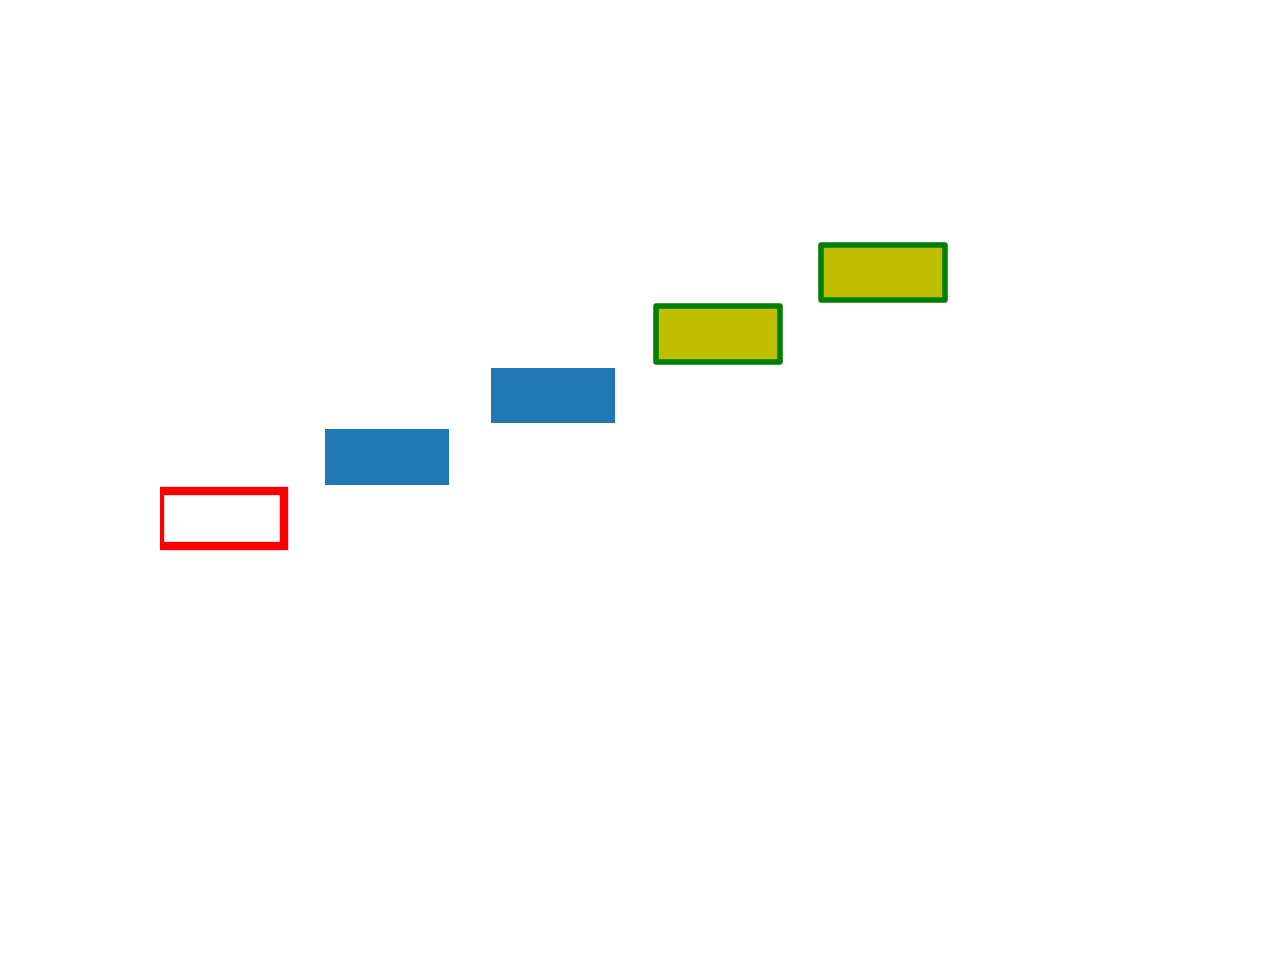

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
%matplotlib notebook

# Create figure
fig = plt.figure()

# Turn off axes frame, ticks, and labels
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_frame_on(False)

# Define x-y range
plt.xlim(-6, 6)
plt.ylim(-6, 6)

# Create some rectangle to work with
boxes = [Rectangle((2*x, x+2), 1.5, 0.9, linewidth=3, edgecolor='r', facecolor='none') for x in range(-3,2)]

# Add rectangles to figure in various ways
ax.add_patch(boxes[0])
ax.add_collection(PatchCollection(boxes[1:3]))
ax.add_collection(PatchCollection(boxes[3:], linewidth=2, edgecolor='g', facecolor='y'));


### Take-aways

- `add_patch` honors individual patch settings
- `PatchCollection` does not honor individual `Rectangle` settings other than position and size
- Can set all attributes identically when create a `PatchCollection`

## Stacked rectangles

<IPython.core.display.Javascript object>


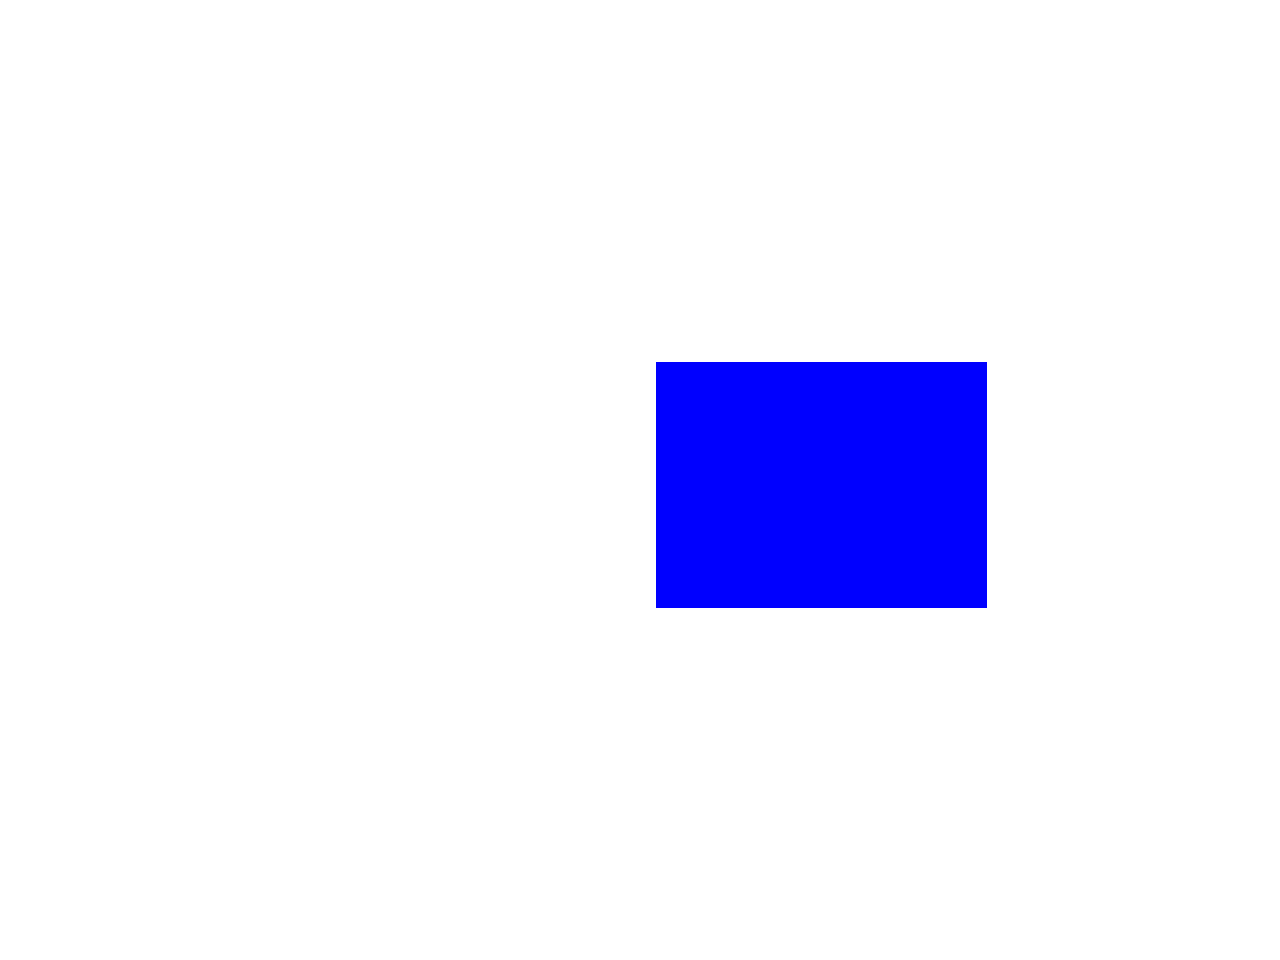

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
%matplotlib notebook

# Create figure
fig = plt.figure()

# Turn off axes frame, ticks, and labels
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_frame_on(False)

# Define x-y range
plt.xlim(-6, 6)
plt.ylim(-6, 6)

# Create some rectangles to work with
boxes = [Rectangle((0, x), 4, 1, linewidth=3, edgecolor='r', facecolor='none') for x in range(-2,2)]

# Add rectangles to figure in various ways
ax.add_collection(PatchCollection(boxes, linewidth=2, edgecolor='none', facecolor='b'));

## Use offsets to move PatchCollection

<IPython.core.display.Javascript object>


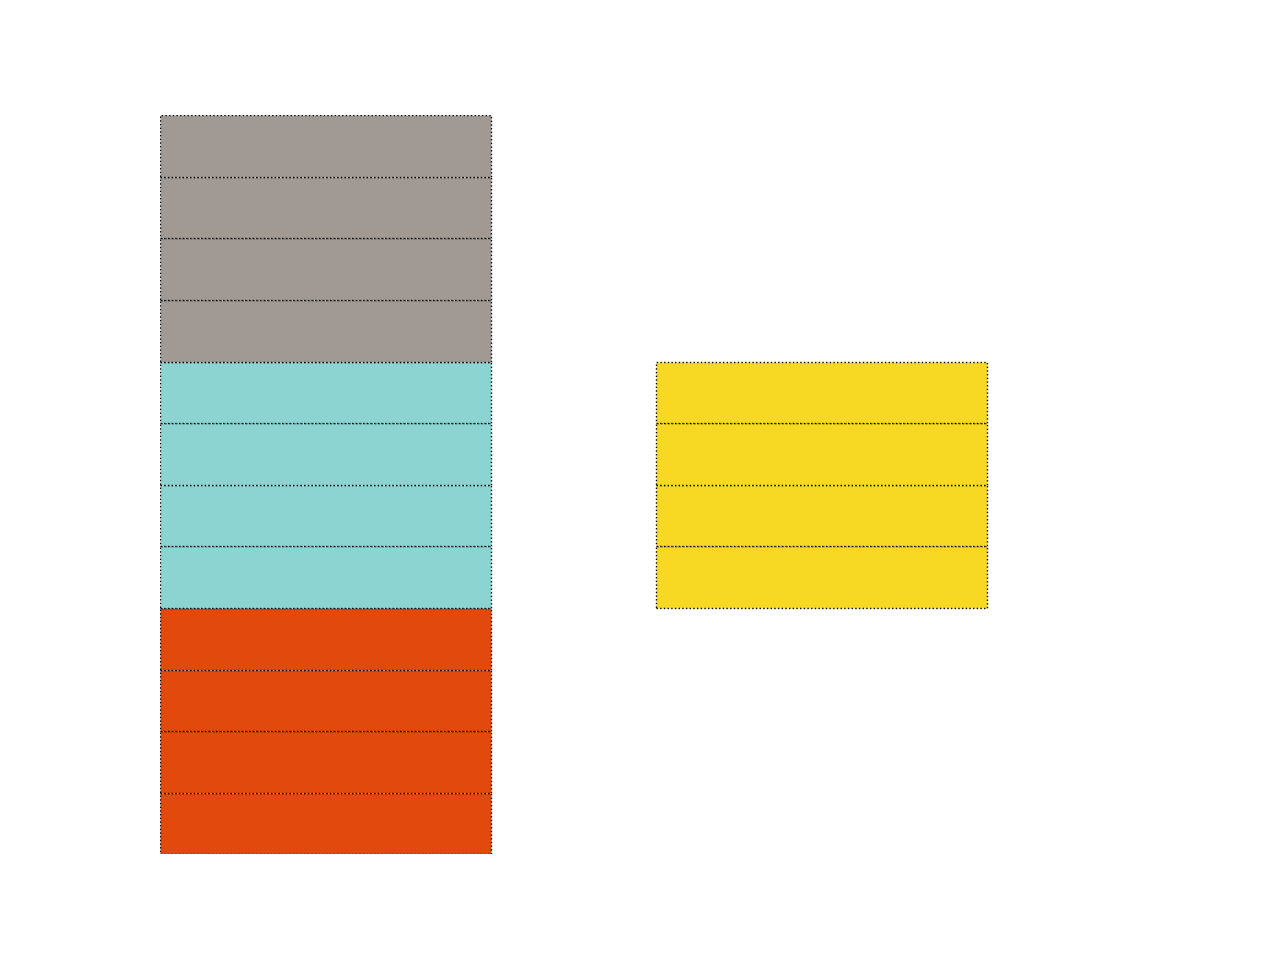

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
%matplotlib notebook

# Create figure
fig = plt.figure()

# Turn off axes frame, ticks, and labels
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_frame_on(False)

# Colors
yellowish = (247/255, 216/255, 35/255, 1.0)
orangish = (226/255, 73/255, 12/255, 1.0)
lightblue = (140/255, 212/255, 210/255, 1.0)
grayish = (161/255, 154/255, 148/255, 1.0)

# Define x-y range
plt.xlim(-6, 6)
plt.ylim(-6, 6)

# Create some rectangles to work with
boxes = [Rectangle((0, x), 4, 1, linewidth=3, edgecolor='r', facecolor='none') for x in range(-2,2)]

pc1 = PatchCollection(boxes, linewidth=0.5, ls=':', edgecolor='k', facecolor=yellowish)
ax.add_collection(pc1)

pc2 = PatchCollection(boxes, linewidth=0.5, ls=':', edgecolor='k', facecolor=orangish)
pc2.set_offset_position('data')
pc2.set_offsets([-6,-4])
ax.add_collection(pc2);

pc3 = PatchCollection(boxes, linewidth=0.5, ls=':', edgecolor='k', facecolor=lightblue)
pc3.set_offset_position('data')
pc3.set_offsets([-6,0])
ax.add_collection(pc3);

pc4 = PatchCollection(boxes, linewidth=0.5, ls=':', edgecolor='k', facecolor=grayish)
ax.add_collection(pc4);
pc4.set_offset_position('data')
pc4.set_offsets([-6,4])


# Movie - moving Rectangles

## Single Rectangle

In [40]:
"""
===========
MovieWriter
===========

This example uses a MovieWriter directly to grab individual frames and write
them to a file. This avoids any event loop integration, but has the advantage
of working with even the Agg backend. This is not recommended for use in an
interactive setting.

"""
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=30, metadata=metadata)

fig = plt.figure()
ax = plt.gca()

r1 = Rectangle((0, 0), 2, 1, linewidth=3, edgecolor='r', facecolor=yellowish)

plt.xlim(-6, 6)
plt.ylim(-6, 6)

x0, y0 = 0, 0
stepsize = 0.05

with writer.saving(fig, "writer_test5.mp4", 100):
    ax.add_patch(r1)
    writer.grab_frame()
    for i in range(100):
        x0 += stepsize
        y0 += stepsize
        r1.set_xy([x0,y0])
        writer.grab_frame()
    for i in range(100):
        x0 -= stepsize
        y0 -= stepsize
        r1.set_xy([x0,y0])
        writer.grab_frame()

## Move PatchCollection of Rectangles

In [43]:
"""
===========
MovieWriter
===========

This example uses a MovieWriter directly to grab individual frames and write
them to a file. This avoids any event loop integration, but has the advantage
of working with even the Agg backend. This is not recommended for use in an
interactive setting.

"""
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=30, metadata=metadata)

fig = plt.figure()
ax = plt.gca()

r1 = Rectangle((0, 0), 2, 1)
r2 = Rectangle((1.1, 1.1), 2, 0.7)

pc = PatchCollection([r1, r2], linewidth=0.5, ls=':', edgecolor='k', facecolor=yellowish)
pc.set_offset_position('data')
ax.add_collection(pc)

plt.xlim(-6, 6)
plt.ylim(-6, 6)

x0, y0 = 0, 0
stepsize = 0.05

with writer.saving(fig, "writer_test6.mp4", 100):
    writer.grab_frame()
    for i in range(100):
        x0 += stepsize
        y0 += stepsize
        pc.set_offsets([x0,y0])
        writer.grab_frame()

## Replace PatchCollection each frame

In [48]:
"""
===========
MovieWriter
===========

This example uses a MovieWriter directly to grab individual frames and write
them to a file. This avoids any event loop integration, but has the advantage
of working with even the Agg backend. This is not recommended for use in an
interactive setting.

"""
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=30, metadata=metadata)

fig = plt.figure()
ax = plt.gca()

r1 = Rectangle((0, 0), 2, 1)
r2 = Rectangle((1.1, 1.1), 2, 0.7)
r3 = Rectangle((2.1, 2.1), 2, 0.3)

patches = {
    0: [r1],
    1: [r1, r2],
    2: [r1, r2, r3]
}

pc = PatchCollection(patches[0], linewidth=0.5, ls=':', edgecolor='k', facecolor=yellowish)
pc.set_offset_position('data')
ax.add_collection(pc)

plt.xlim(-6, 6)
plt.ylim(-6, 6)

x0, y0 = 0, 0
stepsize = 0.05

with writer.saving(fig, "writer_test7.mp4", 100):
    writer.grab_frame()
    for i in range(100):
        pc.remove()
        pc = PatchCollection(patches[i % len(patches)], linewidth=0.5, ls=':', edgecolor='k', facecolor=yellowish)
        ax.add_collection(pc)
        pc.set_offset_position('data')
        x0 += stepsize
        y0 += stepsize
        pc.set_offsets([x0,y0])
        writer.grab_frame()

# Movie development

## Build platform up-down

In [4]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from matplotlib.patches import Rectangle

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=30, metadata=metadata)


# Colors
yellowish = (247/255, 216/255, 35/255, 1.0)
orangish = (226/255, 73/255, 12/255, 1.0)
lightblue = (140/255, 212/255, 210/255, 1.0)
grayish = (161/255, 154/255, 148/255, 1.0)


# Create Figure
fig = plt.figure()
ax = plt.gca()
ax.set_aspect('equal')

# Turn off axes frame, ticks, and labels
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)
# ax.set_frame_on(False)

xmin, xmax = -20, 20
ymin, ymax = -5, 20
x_size = xmax - xmin
y_size = ymin - ymax

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Background
background = Rectangle((xmin,ymin), x_size, y_size, facecolor=(1, 1, 1), edgecolor='none')
ax.add_patch(background)

# Glass window
glass_thickness = 2
glass_window = Rectangle((xmin,-glass_thickness), x_size, glass_thickness, facecolor=lightblue, edgecolor='none')
ax.add_patch(glass_window)

# Resin
resin_height = 14
resin = Rectangle((xmin, 0), x_size, resin_height, facecolor=orangish, edgecolor='none')
ax.add_patch(resin)

# Build platform
bp_margin = 5
bp_width = x_size - 2 * bp_margin
bp_height = 15 #y_size
bp_x_init = xmin + bp_margin
bp_y_init = 2
bp_y = bp_y_init
build_platform = Rectangle((bp_x_init, bp_y_init), bp_width, bp_height, facecolor=grayish, edgecolor='none')
ax.add_patch(build_platform)

moving_parts = []
moving_parts.append(build_platform)

# Layer motion
up_distance = 5
layer_thickness = 2
delta_y = 0.1
n_up = int(up_distance / delta_y)
n_down = int((up_distance - layer_thickness) / delta_y)
print(n_up, n_down)

def update_y_positions(delta_y):
    for mp in moving_parts:
        x, y = mp.get_xy()
        mp.set_xy([x, y + delta_y])
    
def layer_up_down():
    for i in range(n_up):
        update_y_positions(delta_y)
        writer.grab_frame()
    for i in range(n_down):
        update_y_positions(-delta_y)
        writer.grab_frame()


with writer.saving(fig, "movie_dev2.mp4", 100):
    writer.grab_frame()
    # for i in range(100):
    layer_up_down()
    layer_up_down()
#         update_y_positions(delta_y)
#         writer.grab_frame()


50 30


## Instant layer exposure

In [7]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from matplotlib.patches import Rectangle

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=30, metadata=metadata)


# Colors
yellowish = (247/255, 216/255, 35/255, 1.0)
orangish = (226/255, 73/255, 12/255, 1.0)
lightblue = (140/255, 212/255, 210/255, 1.0)
grayish = (161/255, 154/255, 148/255, 1.0)


# Create Figure
fig = plt.figure()
ax = plt.gca()
ax.set_aspect('equal')

# Turn off axes frame, ticks, and labels
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)
# ax.set_frame_on(False)

# Set up frame size and data coordinates
frame_width = 40
xmin, xmax = -frame_width / 2, frame_width / 2
ymin, ymax = -5, 20
x_size = xmax - xmin
y_size = ymin - ymax
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Background - make it white for now
background = Rectangle((xmin,ymin), x_size, y_size, facecolor=(1, 1, 1), edgecolor='none')
ax.add_patch(background)

# Glass window
glass_thickness = 2
glass_window = Rectangle((xmin,-glass_thickness), x_size, glass_thickness, facecolor=lightblue, edgecolor='none')
ax.add_patch(glass_window)

# Resin
resin_height = 14
resin = Rectangle((xmin, 0), x_size, resin_height, facecolor=orangish, edgecolor='none')
ax.add_patch(resin)

# Build platform
bp_margin = 5
bp_width = x_size - 2 * bp_margin
bp_height = 15 #y_size
bp_x = xmin + bp_margin
bp_y_init = 2
bp_y = bp_y_init
build_platform = Rectangle((bp_x, bp_y_init), bp_width, bp_height, facecolor=grayish, edgecolor='none')
ax.add_patch(build_platform)

# List to keep track of all of the parts that move with the build platform
# (i.e., the build platform itself and a growing number of layers as a print proceeds)
moving_parts = []
moving_parts.append(build_platform)

# Layer info
layer_thickness = 2
layer_width = 20
assert layer_width < frame_width
layer_x = -layer_width / 2
layer_y_init = 0

# Layer motion
up_distance = 5
delta_y = 0.1
n_up = int(up_distance / delta_y)
n_down = int((up_distance - layer_thickness) / delta_y)
print(n_up, n_down)

def update_y_positions(delta_y):
    for mp in moving_parts:
        x, y = mp.get_xy()
        mp.set_xy([x, y + delta_y])
    
def layer_up_down():
    for i in range(n_up):
        update_y_positions(delta_y)
        writer.grab_frame()
    for i in range(n_down):
        update_y_positions(-delta_y)
        writer.grab_frame()

def instant_uniform_exposure():
    layer = Rectangle((layer_x, layer_y_init), layer_width, layer_thickness, facecolor=yellowish, edgecolor='none')
    ax.add_patch(layer)
    moving_parts.append(layer)
        

with writer.saving(fig, "movie_dev3.mp4", 100):
    writer.grab_frame()
    for i in range(10):
        writer.grab_frame()
    instant_uniform_exposure()
    layer_up_down()
    instant_uniform_exposure()
    layer_up_down()
#         update_y_positions(delta_y)
#         writer.grab_frame()


50 30


In [8]:
moving_parts[1]

In [11]:
moving_parts[1].get_facecolor()

(0.9686274509803922, 0.8470588235294118, 0.13725490196078433, 1.0)

In [13]:
list(moving_parts[1].get_facecolor())

[0.9686274509803922, 0.8470588235294118, 0.13725490196078433, 1.0]

In [10]:
help(moving_parts[1].set_facecolor)

Help on method set_facecolor in module matplotlib.patches:

set_facecolor(color) method of matplotlib.patches.Rectangle instance
    Set the patch face color.
    
    Parameters
    ----------
    color : color or None



## Gradual layer exposure

In [18]:
%%time

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from matplotlib.patches import Rectangle

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=30, metadata=metadata)


# Colors
yellowish = (247/255, 216/255, 35/255, 1.0)
orangish = (226/255, 73/255, 12/255, 1.0)
lightblue = (140/255, 212/255, 210/255, 1.0)
grayish = (161/255, 154/255, 148/255, 1.0)


# Create Figure
fig = plt.figure()
ax = plt.gca()
ax.set_aspect('equal')

# Turn off axes frame, ticks, and labels
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)
# ax.set_frame_on(False)

# Set up frame size and data coordinates
frame_width = 40
xmin, xmax = -frame_width / 2, frame_width / 2
ymin, ymax = -5, 20
x_size = xmax - xmin
y_size = ymin - ymax
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Background - make it white for now
background = Rectangle((xmin,ymin), x_size, y_size, facecolor=(1, 1, 1), edgecolor='none')
ax.add_patch(background)

# Glass window
glass_thickness = 2
glass_window = Rectangle((xmin,-glass_thickness), x_size, glass_thickness, facecolor=lightblue, edgecolor='none')
ax.add_patch(glass_window)

# Resin
resin_height = 14
resin = Rectangle((xmin, 0), x_size, resin_height, facecolor=orangish, edgecolor='none')
ax.add_patch(resin)

# Build platform
bp_margin = 5
bp_width = x_size - 2 * bp_margin
bp_height = 15 #y_size
bp_x = xmin + bp_margin
bp_y_init = 2
bp_y = bp_y_init
build_platform = Rectangle((bp_x, bp_y_init), bp_width, bp_height, facecolor=grayish, edgecolor='none')
ax.add_patch(build_platform)

# List to keep track of all of the parts that move with the build platform
# (i.e., the build platform itself and a growing number of layers as a print proceeds)
moving_parts = []
moving_parts.append(build_platform)

# Layer info
layer_thickness = 2
layer_width = 20
assert layer_width < frame_width
layer_x = -layer_width / 2
layer_y_init = 0

# Layer motion
up_distance = 5
delta_y = 0.1
n_up = int(up_distance / delta_y)
n_down = int((up_distance - layer_thickness) / delta_y)
print(n_up, n_down)

def update_y_positions(delta_y):
    for mp in moving_parts:
        x, y = mp.get_xy()
        mp.set_xy([x, y + delta_y])
    
def layer_up_down():
    for i in range(n_up):
        update_y_positions(delta_y)
        writer.grab_frame()
    for i in range(n_down):
        update_y_positions(-delta_y)
        writer.grab_frame()

def new_exposed_layer():
    layer = Rectangle((layer_x, layer_y_init), layer_width, layer_thickness, facecolor=yellowish, edgecolor='none')
    ax.add_patch(layer)
    moving_parts.append(layer)

def gradual_layer_exposure(patch, num_frames):
    color = list(patch.get_facecolor())
    alphas = np.linspace(0, 1, num=num_frames)
    for alpha in alphas:
        color[3] = alpha
        patch.set_facecolor(color)
        writer.grab_frame()


    
with writer.saving(fig, "movie_dev4.mp4", 100):
    writer.grab_frame()
    # 1/3 second pause
    for i in range(10):
        writer.grab_frame()
    
    num_layers = 5
    for i in range(num_layers):
        new_exposed_layer()
        gradual_layer_exposure(moving_parts[-1], 45)
        layer_up_down()


50 30
CPU times: user 16.5 s, sys: 1.36 s, total: 17.8 s
Wall time: 19.4 s


## Refactor &rarr; multiple patches per layer

In [5]:
%%time

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from matplotlib.patches import Rectangle

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=30, metadata=metadata)


# Colors
yellowish = (247/255, 216/255, 35/255, 1.0)
orangish = (226/255, 73/255, 12/255, 1.0)
lightblue = (140/255, 212/255, 210/255, 1.0)
grayish = (161/255, 154/255, 148/255, 1.0)


# Create Figure
fig = plt.figure()
ax = plt.gca()
ax.set_aspect('equal')

# Turn off axes frame, ticks, and labels
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)
# ax.set_frame_on(False)


# Set up frame size and data coordinates
frame_width = 40
xmin, xmax = -frame_width / 2, frame_width / 2
ymin, ymax = -5, 20
x_size, y_size = xmax - xmin, ymin - ymax
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


# Background - make it white for now
background = Rectangle((xmin,ymin), x_size, y_size, facecolor=(1, 1, 1), edgecolor='none')
ax.add_patch(background)


# Glass window
glass_thickness = 2
glass_window = Rectangle((xmin,-glass_thickness), x_size, glass_thickness, facecolor=lightblue, edgecolor='none')
ax.add_patch(glass_window)


# Resin
resin_height = 14
resin = Rectangle((xmin, 0), x_size, resin_height, facecolor=orangish, edgecolor='none')
ax.add_patch(resin)


# Layer info
layer_thickness = 1
layer_width = 26
assert layer_width < frame_width
layer_x = -layer_width / 2
layer_y_init = 0


# Build platform
bp_margin = 5
bp_width = x_size - 2 * bp_margin
bp_height = 15 #y_size
bp_x = xmin + bp_margin
bp_y = layer_thickness
build_platform = Rectangle((bp_x, bp_y), bp_width, bp_height, facecolor=grayish, edgecolor='none')
ax.add_patch(build_platform)


# List to keep track of all of the parts that move with the build platform
# (i.e., the build platform itself and a growing number of layers as a print proceeds)
# Each element in the list can be an individual patch or a list of patches.
moving_parts = []
moving_parts.append(build_platform)


# Layer motion
up_distance = 5
delta_y = 0.1
n_up = int(up_distance / delta_y)
n_down = int((up_distance - layer_thickness) / delta_y)
print(n_up, n_down)


def ensure_it_is_a_list(some_element):
    if not isinstance(some_element, list):
        return [some_element]
    else:
        return some_element


def move_moving_parts(dx=0, dy=0):
    for mp in moving_parts:
        mp = ensure_it_is_a_list(mp)
#         if not isinstance(mp, list):
#             mp = [mp]
        for p in mp:
            x, y = p.get_xy()
            p.set_xy([x + dx, y + dy])
    
    
def move(n, direction):
    assert direction in ['up', 'down']
    sign = 1 if direction == 'up' else -1
    for i in range(n):
        move_moving_parts(0, sign*delta_y)
        writer.grab_frame()
        
        
def create_homogeneous_resin_layer():
    layer = Rectangle((layer_x, layer_y_init), layer_width, layer_thickness, facecolor=yellowish, edgecolor='none')
    ax.add_patch(layer)
    moving_parts.append(layer)
        
        
def create_channel_resin_layer(chan_width=6):
    layer_patches = []
    left = Rectangle((layer_x, layer_y_init), 
                      (layer_width - chan_width) / 2, layer_thickness, 
                      facecolor=yellowish, edgecolor='none')
    layer_patches.append(left)
    right = Rectangle((chan_width / 2, layer_y_init), 
                      (layer_width - chan_width) / 2, layer_thickness, 
                      facecolor=yellowish, edgecolor='none')
    layer_patches.append(right)
    for patch in layer_patches:
        ax.add_patch(patch)
    moving_parts.append(layer_patches)

    
def gradual_resin_layer_exposure(num_frames):
    alphas = np.linspace(0, 1, num=num_frames)
    patches = ensure_it_is_a_list(moving_parts[-1])
    if not isinstance(patches, list):
        patches = [patches]
    for alpha in alphas:
        for patch in patches:
            color = list(patch.get_facecolor())
            color[3] = alpha
            patch.set_facecolor(color)
        writer.grab_frame()

    
with writer.saving(fig, "movie_dev5.mp4", 100):
    writer.grab_frame()
    # 1/3 second pause
    for i in range(10):
        writer.grab_frame()
    
    num_layers = 5
    channel_layers = [1, 2, 3]
    
    for i_layer in range(num_layers):
        if i_layer in channel_layers:
            create_channel_resin_layer()
        else:
            create_homogeneous_resin_layer()
        gradual_resin_layer_exposure(30)
        move(n_up, 'up')
        if i_layer != num_layers - 1:
            move(n_down, 'down')


50 40
CPU times: user 9.12 s, sys: 295 ms, total: 9.42 s
Wall time: 9.56 s
